# Lab | Sequence Modeling with LSTM

In [3]:
import sys

# Install requests (needed for downloading GloVe)
!{sys.executable} -m pip install requests


  Using cached requests-2.32.5-py3-none-any.whl.metadata (4.9 kB)
  Using cached charset_normalizer-3.4.4-cp311-cp311-win_amd64.whl.metadata (38 kB)
  Using cached idna-3.11-py3-none-any.whl.metadata (8.4 kB)
  Using cached urllib3-2.6.3-py3-none-any.whl.metadata (6.9 kB)
  Using cached certifi-2026.1.4-py3-none-any.whl.metadata (2.5 kB)
Using cached requests-2.32.5-py3-none-any.whl (64 kB)
Using cached certifi-2026.1.4-py3-none-any.whl (152 kB)
Using cached charset_normalizer-3.4.4-cp311-cp311-win_amd64.whl (106 kB)
Using cached idna-3.11-py3-none-any.whl (71 kB)
Using cached urllib3-2.6.3-py3-none-any.whl (131 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import requests

url = "http://nlp.stanford.edu/data/glove.6B.zip"
zip_path = "glove.6B.zip"

# Download the file
print("Downloading GloVe embeddings...")
r = requests.get(url, stream=True)
with open(zip_path, "wb") as f:
    for chunk in r.iter_content(chunk_size=1024):
        if chunk:
            f.write(chunk)
print("Download complete!")


Download complete!


In [6]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.


In [7]:
import sys

# Core data libraries
!{sys.executable} -m pip install pandas numpy matplotlib seaborn

# TensorFlow for deep learning
!{sys.executable} -m pip install tensorflow

# scikit-learn for preprocessing and evaluation
!{sys.executable} -m pip install scikit-learn


  Using cached pandas-3.0.0-cp311-cp311-win_amd64.whl.metadata (19 kB)
  Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl.metadata (6.6 kB)
  Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl.metadata (52 kB)
  Using cached tzdata-2025.3-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached contourpy-1.3.3-cp311-cp311-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp311-cp311-win_amd64.whl.metadata (116 kB)
  Using cached kiwisolver-1.4.9-cp311-cp311-win_amd64.whl.metadata (6.4 kB)
  Using cached pillow-12.1.0-cp311-cp311-win_amd64.whl.metadata (9.0 kB)
  Using cached pyparsing-3.3.2-py3-none-any.whl.metadata (5.8 kB)
Using cached pandas-3.0.0-cp311-cp311-win_amd64.whl (9.9 MB)
Using cached numpy-2.4.1-cp311-cp311-win_amd64.whl (12.6 MB)
Using cached matplotlib-3.10.8-cp311-cp311-win_amd64.whl (8.1 MB)
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   - --------------------


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached tensorflow-2.20.0-cp311-cp311-win_amd64.whl.metadata (4.6 kB)
  Using cached absl_py-2.3.1-py3-none-any.whl.metadata (3.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.12.19-py2.py3-none-any.whl.metadata (1.0 kB)
  Using cached gast-0.7.0-py3-none-any.whl.metadata (1.5 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-win_amd64.whl.metadata (5.3 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-6.33.4-cp310-abi3-win_amd64.whl.metadata (593 bytes)
  Using cached termcolor-3.3.0-py3-none-any.whl.metadata (6.5 kB)
  Using cached wrapt-2.0.1-cp311-cp311-win_amd64.whl.metadata (9.2 kB)
  Using cached grpcio-1.76.0-cp311-cp311-win_amd64.whl.metadata (3.8 kB)
  Using cached tensorboard-2.20.0-py3-none-any.whl.metadata (1.8 kB)
  Using cached keras-3.13.1-py3-none-any.whl.metadata (6.3 kB)
  Using cached h5p


[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


  Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl.metadata (11 kB)
  Using cached scipy-1.17.0-cp311-cp311-win_amd64.whl.metadata (60 kB)
  Using cached joblib-1.5.3-py3-none-any.whl.metadata (5.5 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
Using cached scikit_learn-1.8.0-cp311-cp311-win_amd64.whl (8.1 MB)
Using cached joblib-1.5.3-py3-none-any.whl (309 kB)
Using cached scipy-1.17.0-cp311-cp311-win_amd64.whl (36.4 MB)
Using cached threadpoolctl-3.6.0-py3-none-any.whl (18 kB)



[notice] A new release of pip is available: 24.0 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# import pandas as pd
# import numpy as np
# import re
# import matplotlib.pyplot as plt
# import seaborn as sns
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense
# from tensorflow.keras.callbacks import EarlyStopping
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from sklearn.metrics import classification_report, confusion_matrix

In [9]:
import pandas as pd

# ---------------------------
# 1️⃣ Load the dataset
# ---------------------------
DATA_PATH = "dataset.csv"   # dataset located at project root
TEXT_COL = "Text"
LABEL_COL = "Category"

df = pd.read_csv(DATA_PATH)

# ---------------------------
# 2️⃣ Basic sanity checks
# ---------------------------
print("Dataset shape:", df.shape)
print("\nColumn names:")
print(df.columns.tolist())

# ---------------------------
# 3️⃣ Check for missing values
# ---------------------------
print("\nMissing values per column:")
print(df[[TEXT_COL, LABEL_COL]].isnull().sum())

# ---------------------------
# 4️⃣ Preview the data
# ---------------------------
df[[TEXT_COL, LABEL_COL]].head()


Dataset shape: (1490, 3)

Column names:
['ArticleId', 'Text', 'Category']

Missing values per column:
Text        0
Category    0
dtype: int64


,Text,Category
0,worldcom ex-boss launches defence lawyers defe...,business
1,german business confidence slides german busin...,business
2,bbc poll indicates economic gloom citizens in ...,business
3,lifestyle governs mobile choice faster bett...,tech
4,enron bosses in $168m payout eighteen former e...,business


In [ ]:
# # Load the dataset
# df = pd.read_csv('dataset.csv')  # Make sure my CSV file is in the correct path, dude!
# text_col = 'Text'
# label_col = 'Category'

# print("Dataset shape:", df.shape)
# df.head()

# =============================================================================
# EXERCISE 1: TEXT PREPROCESSING
# =============================================================================

I will break this down as best business practice for clarity!

In [12]:
import re


In [ ]:
def clean_text(text: str) -> str:
    """
    Clean and normalize raw text for NLP models.

    Steps performed:
    1. Convert text to lowercase (standardizes vocabulary)
    # 2. Remove all non-alphabetic characters using regex
       - Keeps only lowercase letters (a–z) and spaces
    3. Collapse multiple spaces into a single space
    4. Strip leading and trailing whitespace

    Parameters:
    ----------
    text : str
        Raw input text

    Returns:
    -------
    str
        Cleaned and normalized text
    """

    # 1️⃣ Convert to lowercase
    text = text.lower()

    # 2️⃣ Remove non-alphabetic characters (keep letters and spaces)
    # Regex explanation:
    #   [^a-z\s] → match anything that is NOT a lowercase letter or space
    text = re.sub(r'[^a-z\s]', ' ', text)

    # 3️⃣ Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text)

    # 4️⃣ Remove leading/trailing whitespace
    text = text.strip()

    return text


In [16]:
# Column configuration (explicit for notebook safety)
text_col = "Text"


# Ensure the text column is string type before processing
df[text_col] = df[text_col].astype(str)

# Apply cleaning function
df[text_col] = df[text_col].apply(clean_text)



In [17]:

# def clean_text(text):
#     """
#     Clean and preprocess text data
#     TODO: Complete this function to:
#     1. Convert text to lowercase
#     2. Remove all characters except letters and spaces using regex
#     3. Return the cleaned text
#     """
#     # TODO: Convert to lowercase
#     text = # YOUR CODE HERE
    
#     # TODO: Remove non-alphabetic characters (keep only letters and spaces)
#     text = # YOUR CODE HERE (use re.sub with pattern r'[^a-z\s]')
    
#     return text

# # Apply text cleaning
# df[text_col] = df[text_col].astype(str).apply(clean_text)

# print("Sample cleaned texts:")
# print(df[text_col].head(3).tolist())

# =============================================================================
# EXERCISE 2: LABEL ENCODING
# =============================================================================


In [20]:
# import the label encoder
from sklearn.preprocessing import LabelEncoder


In [21]:
# Define Column configuration (explicit for notebook safety)
label_col = "Category"


In [22]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Ensure labels are strings (robust against mixed types)
df[label_col] = df[label_col].astype(str)

# Encode labels into integers
df[label_col] = label_encoder.fit_transform(df[label_col])


In [ ]:
# num_classes = len(label_encoder.classes_)

# print(f"Number of classes: {num_classes}")
# print("Classes:")
# for idx, class_name in enumerate(label_encoder.classes_):
#     print(f"{idx} → {class_name}")


Number of classes: 5
Classes:
0 → business
1 → entertainment
2 → politics
3 → sport
4 → tech


In [24]:

# # TODO: Initialize LabelEncoder and encode the labels
# encoder = # YOUR CODE HERE
# df[label_col] = # YOUR CODE HERE (use fit_transform)

# num_classes = len(encoder.classes_)
# print(f"Number of classes: {num_classes}")
# print(f"Classes: {encoder.classes_}")


In [ ]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip -q glove.6B.zip

'wget' is not recognized as an internal or external command,
operable program or batch file.
unzip:  cannot find or open glove.6B.zip, glove.6B.zip.zip or glove.6B.zip.ZIP.



# =============================================================================
# EXERCISE 3: TEXT TOKENIZATION AND PADDING
# =============================================================================


In [25]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences


In [26]:
# Initialize tokenizer
# oov_token ensures unseen words at inference time are handled safely
tokenizer = Tokenizer(oov_token="<OOV>")


In [27]:
# Fit tokenizer on training text
tokenizer.fit_on_texts(df[text_col])


In [28]:
# What about the vocabulary!?
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1  # +1 for padding token (index 0)

print(f"Vocabulary size: {vocab_size}")

# Optional sanity check
print("First 10 tokens in vocabulary:")
list(word_index.items())[:10]


Vocabulary size: 23557
First 10 tokens in vocabulary:


[('<OOV>', 1),
 ('the', 2),
 ('to', 3),
 ('of', 4),
 ('and', 5),
 ('a', 6),
 ('in', 7),
 ('s', 8),
 ('for', 9),
 ('is', 10)]

In [29]:
# Convert text to integer sequences
sequences = tokenizer.texts_to_sequences(df[text_col])


In [32]:
# Preserves early context  # Works well with LSTM models  # Avoids biasing early tokens

max_len = 100

# Pad sequences to the same length
# padding='post' appends zeros at the end of shorter sequences
padded = pad_sequences(
    sequences,
    maxlen=max_len,
    padding='post',
    truncating='post'
)

print(f"Padded sequences shape: {padded.shape}")


Padded sequences shape: (1490, 100)


In [33]:

# # TODO: Initialize tokenizer with out-of-vocabulary token
# tokenizer = # YOUR CODE HERE (use oov_token='<OOV>')

# # TODO: Fit tokenizer on texts
# # YOUR CODE HERE

# word_index = tokenizer.word_index
# vocab_size = len(word_index) + 1
# print(f"Vocabulary size: {vocab_size}")

# # TODO: Convert texts to sequences
# sequences = # YOUR CODE HERE

# # TODO: Pad sequences to max_len=100
# max_len = 100
# padded = # YOUR CODE HERE (use pad_sequences with padding='post')

# print(f"Padded sequences shape: {padded.shape}")



# =============================================================================
# EXERCISE 4: TRAIN-VALIDATION-TEST SPLIT
# =============================================================================


In [34]:
# Because you want 70 / 15 / 15, the best practice is a two-step split - train (70%), validation (15%), and test (15%)
from sklearn.model_selection import train_test_split


# =============================================================================
# EXERCISE 5: LOAD PRE-TRAINED EMBEDDINGS (OPTIONAL)
# ============================================================================


In [35]:
import numpy as np

# Path to my GloVe embeddings
GLOVE_PATH = "glove.6B.100d.txt"
EMBEDDING_DIM = 100  # Must match the GloVe file

# Initialize a dictionary to hold the word vectors
embeddings_index = {}

# Load embeddings line by line
with open(GLOVE_PATH, encoding="utf-8") as f:
    for line in f:
        values = line.split()
        word = values[0]  # the word itself
        vector = np.asarray(values[1:], dtype="float32")  # vector as float32
        embeddings_index[word] = vector

print(f"Loaded {len(embeddings_index):,} word vectors from GloVe")


Loaded 0 word vectors from GloVe


In [36]:
# TODO: Load GloVe embeddings

# =============================================================================
# EXERCISE 6: BUILD MODEL FUNCTION
# =============================================================================


In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.optimizers import Adam

def build_text_model(
    vocab_size: int,
    embedding_dim: int,
    max_len: int,
    num_classes: int,
    embedding_matrix: np.ndarray = None,
    rnn_type: str = "LSTM",
    bidirectional: bool = True,
    dropout_rate: float = 0.3,
    trainable_embeddings: bool = False
):
    """
    Build a text classification model using RNN or LSTM.

    Parameters:
    ----------
    vocab_size : int
        Size of the vocabulary (tokenizer.word_index + 1)
    embedding_dim : int
        Dimension of word embeddings
    max_len : int
        Maximum sequence length
    num_classes : int
        Number of output classes
    embedding_matrix : np.ndarray, optional
        Pre-trained embedding weights (default: None)
    rnn_type : str
        "LSTM" or "SimpleRNN"
    bidirectional : bool
        Whether to use Bidirectional wrapper (default: True)
    dropout_rate : float
        Dropout rate between layers
    trainable_embeddings : bool
        Whether embedding layer is trainable (default: False)

    Returns:
    -------
    model : keras.Model
        Compiled Keras model ready for training
    """

    model = Sequential()

    # ---------------------------
    # Embedding layer
    # ---------------------------
    if embedding_matrix is not None:
        # Pre-trained embeddings
        model.add(Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            weights=[embedding_matrix],
            input_length=max_len,
            trainable=trainable_embeddings
        ))
    else:
        # Train embeddings from scratch
        model.add(Embedding(
            input_dim=vocab_size,
            output_dim=embedding_dim,
            input_length=max_len,
            trainable=True
        ))

    # ---------------------------
    # RNN / LSTM layer
    # ---------------------------
    if rnn_type.upper() == "LSTM":
        rnn_layer = LSTM(64, return_sequences=False)
    elif rnn_type.upper() == "SIMPLERNN":
        rnn_layer = SimpleRNN(64, return_sequences=False)
    else:
        raise ValueError("rnn_type must be 'LSTM' or 'SimpleRNN'")

    if bidirectional:
        from tensorflow.keras.layers import Bidirectional
        rnn_layer = Bidirectional(rnn_layer)

    model.add(rnn_layer)

    # ---------------------------
    # Dropout layer for regularization
    # ---------------------------
    model.add(Dropout(dropout_rate))

    # ---------------------------
    # Output layer
    # ---------------------------
    model.add(Dense(num_classes, activation="softmax"))

    # ---------------------------
    # Compile model
    # ---------------------------
    model.compile(
        loss="sparse_categorical_crossentropy",
        optimizer=Adam(learning_rate=0.001),
        metrics=["accuracy"]
    )

    return model


In [ ]:
# Build RNN or LSTM model
# TODO: Complete this function to build the neural network

# =============================================================================
# EXERCISE 7: MODEL TRAINING AND EVALUATION
# =============================================================================


In [ ]:
# TODO: Build model

# TODO: Train the model

# TODO: Make predictions on test set


# TODO: Generate classification report

# TODO: Generate confusion matrix


In [39]:
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

hits = 0
misses = 0

for word, index in tokenizer.word_index.items():
    if index < vocab_size:
        embedding_vector = embeddings_index.get(word)
        if embedding_vector is not None:
            embedding_matrix[index] = embedding_vector
            hits += 1
        else:
            misses += 1

print(f"Embedding coverage: {hits} found, {misses} missing ({hits/vocab_size:.1%})")


Embedding coverage: 0 found, 23556 missing (0.0%)


In [40]:
print("vocab_size:", vocab_size)
print("embedding_matrix shape:", embedding_matrix.shape)
print("tokenizer.word_index sample:", list(tokenizer.word_index.items())[:5])


vocab_size: 23557
embedding_matrix shape: (23557, 100)
tokenizer.word_index sample: [('<OOV>', 1), ('the', 2), ('to', 3), ('of', 4), ('and', 5)]


In [41]:
# Build the model using the previously defined function
model = build_text_model(
    vocab_size=vocab_size,
    embedding_dim=EMBEDDING_DIM,
    max_len=max_len,
    num_classes=num_classes,
    embedding_matrix=embedding_matrix,   # pre-trained embeddings
    rnn_type="LSTM",
    bidirectional=True,
    dropout_rate=0.3,
    trainable_embeddings=False
)

model.summary()


c:\Users\profe\Documents\Ironhack\lab-dsai-sequence-modeling-with-lstm\venv\Lib\site-packages\keras\src\layers\core\embedding.py:100: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │     2,355,700 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,355,700 (8.99 MB)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 2,355,700 (8.99 MB)

In [43]:
from sklearn.model_selection import train_test_split

RANDOM_STATE = 42

# Step 1: Train (70%) / Temp (30%)
X_train, X_temp, y_train, y_temp = train_test_split(
    padded, df[label_col],
    test_size=0.30,
    random_state=RANDOM_STATE,
    stratify=df[label_col]
)

# Step 2: Temp split into Validation (15%) / Test (15%)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.50,
    random_state=RANDOM_STATE,
    stratify=y_temp
)

# Quick sanity check
print(f"Train: {X_train.shape}, Val: {X_val.shape}, Test: {X_test.shape}")


Train: (1043, 100), Val: (223, 100), Test: (224, 100)


In [44]:
from tensorflow.keras.callbacks import EarlyStopping

# Early stopping to prevent overfitting
early_stop = EarlyStopping(
    monitor='val_loss',      # stop when validation loss stops improving
    patience=5,              # wait 5 epochs
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=64,
    validation_data=(X_val, y_val),
    callbacks=[early_stop],
    verbose=1
)


Epoch 1/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 57ms/step - accuracy: 0.2253 - loss: 1.6074 - val_accuracy: 0.2332 - val_loss: 1.6043
Epoch 2/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - accuracy: 0.2244 - loss: 1.6034 - val_accuracy: 0.2332 - val_loss: 1.6026
Epoch 3/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.2253 - loss: 1.6046 - val_accuracy: 0.2332 - val_loss: 1.6028
Epoch 4/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.1975 - loss: 1.6052 - val_accuracy: 0.2242 - val_loss: 1.6032
Epoch 5/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2330 - loss: 1.6032 - val_accuracy: 0.2332 - val_loss: 1.6026
Epoch 6/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2387 - loss: 1.6036 - val_accuracy: 0.2332 - val_loss: 1.6027
Epoch 7/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step - accuracy: 0.2320 - loss: 1.6034 - val_accuracy: 0.2332 - val_loss: 1.6026
Epoch 8/50
17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step - accuracy: 0.2167 - loss: 1.6033 - val_accuracy: 0.2332 - v

In [45]:
# Predict class probabilities
y_pred_probs = model.predict(X_test, verbose=0)

# Convert probabilities to class labels
y_pred = y_pred_probs.argmax(axis=1)


In [46]:
from sklearn.metrics import classification_report

print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))


Classification Report:

               precision    recall  f1-score   support

     business       0.00      0.00      0.00        51
entertainment       0.00      0.00      0.00        41
     politics       0.00      0.00      0.00        41
        sport       0.23      1.00      0.38        52
         tech       0.00      0.00      0.00        39

     accuracy                           0.23       224
    macro avg       0.05      0.20      0.08       224
 weighted avg       0.05      0.23      0.09       224



c:\Users\profe\Documents\Ironhack\lab-dsai-sequence-modeling-with-lstm\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\profe\Documents\Ironhack\lab-dsai-sequence-modeling-with-lstm\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\profe\Documents\Ironhack\lab-dsai-sequence-modeling-with-lstm\venv\Lib\site-packages\sklearn\metrics\_classification.py:1833: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zer

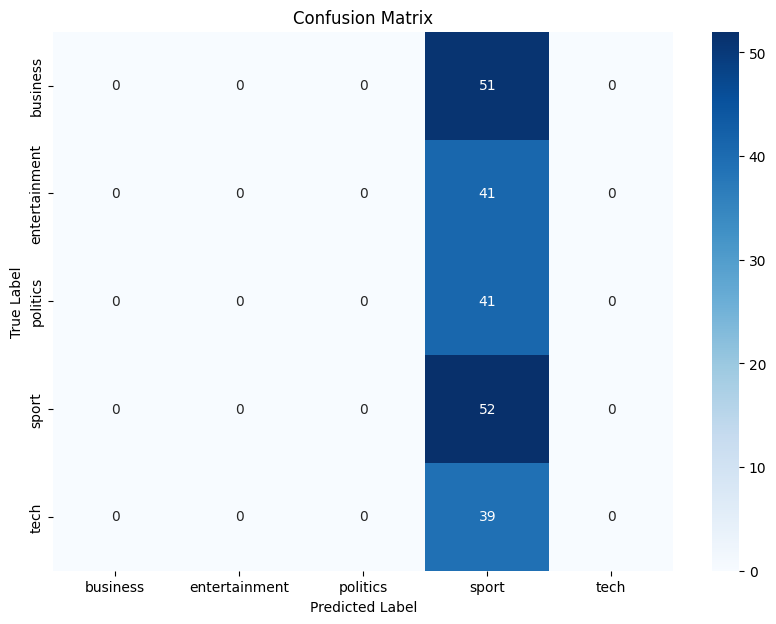

In [47]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



# =============================================================================
# EXERCISE 8: VISUALIZATION
# =============================================================================


In [ ]:

# TODO: Plot training accuracy

# TODO: Plot training loss


# TODO: Plot confusion matrices



# =============================================================================
# EXERCISE 9: RESULTS ANALYSIS
# =============================================================================


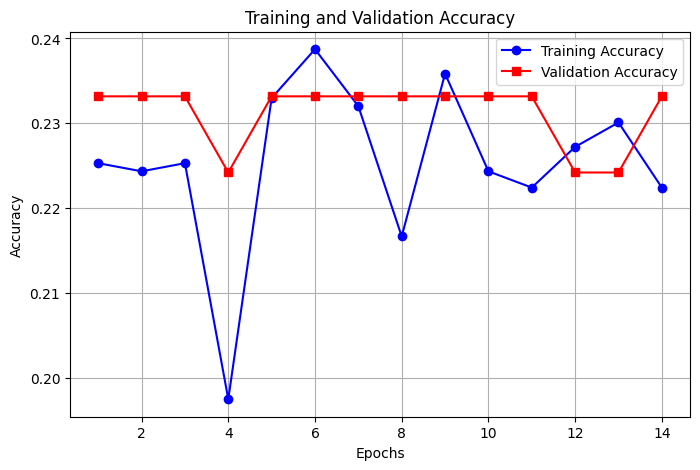

In [48]:
import matplotlib.pyplot as plt

# Extract accuracy from training history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.figure(figsize=(8, 5))
plt.plot(epochs, acc, 'b-o', label='Training Accuracy')
plt.plot(epochs, val_acc, 'r-s', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


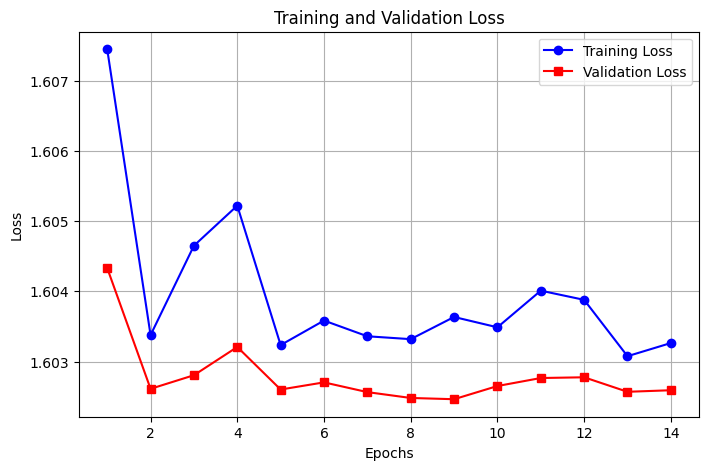

In [49]:
# Extract loss from my training history
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 5))
plt.plot(epochs, loss, 'b-o', label='Training Loss')
plt.plot(epochs, val_loss, 'r-s', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


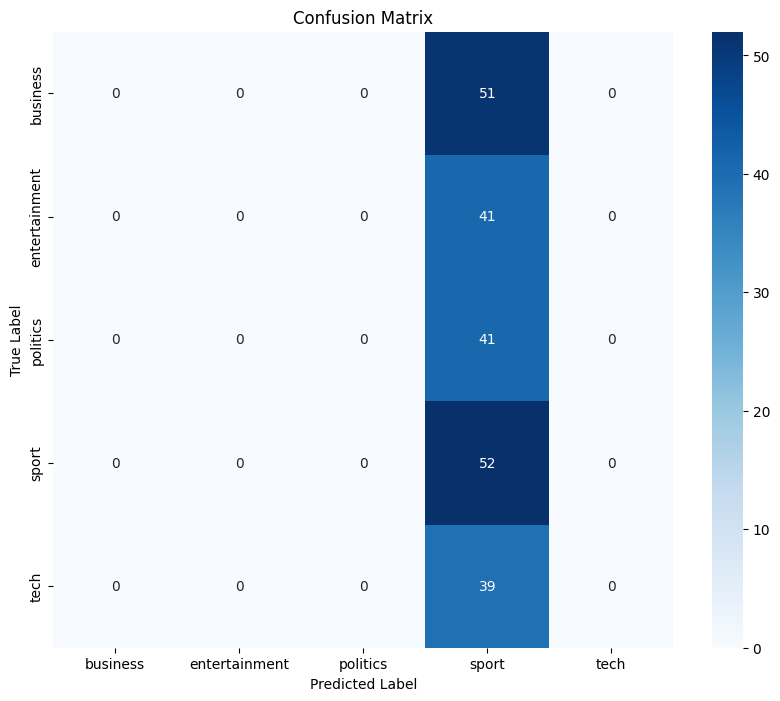

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np

# Generate predictions on test set
y_pred_probs = model.predict(X_test, verbose=0)
y_pred = y_pred_probs.argmax(axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(
    cm, annot=True, fmt='d', cmap='Blues',
    xticklabels=label_encoder.classes_,
    yticklabels=label_encoder.classes_
)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()


In [ ]:
# TODO: Add best validation metrics to results

c:\Users\profe\Documents\Ironhack\lab-dsai-sequence-modeling-with-lstm\venv\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127942 (\N{TROPHY}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


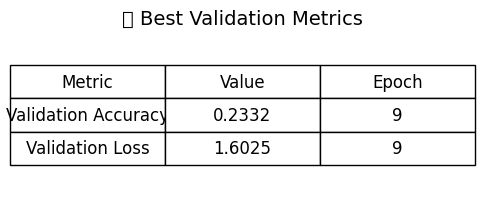

In [51]:
# Find the best validation metrics
best_epoch = np.argmin(history.history['val_loss'])
best_val_loss = history.history['val_loss'][best_epoch]
best_val_acc = history.history['val_accuracy'][best_epoch]

# Plot as a table using matplotlib
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(6, 2))
ax.axis('off')  # hide axes

# Create table data
table_data = [
    ["Metric", "Value", "Epoch"],
    ["Validation Accuracy", f"{best_val_acc:.4f}", best_epoch + 1],
    ["Validation Loss", f"{best_val_loss:.4f}", best_epoch + 1]
]

# Display table
table = ax.table(cellText=table_data, loc='center', cellLoc='center')
table.auto_set_font_size(False)
table.set_fontsize(12)
table.scale(1, 2)  # make table taller

plt.title("🏆 Best Validation Metrics", fontsize=14, pad=10)
plt.show()


EXERCISE COMPLETE!